<a href="https://colab.research.google.com/github/JARIN-TIAS/DataAnalysis-/blob/main/textanalyticscdsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import necessary basic data analysis libraries

import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


###Loading Doctor CRM Data

In [2]:
doctor_crm = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/Doctor_crm_data.xlsx')

###Checking Data

In [4]:
doctor_crm.head(5)

,SL,Agent,Name,Brand,Phone,Query Type,Caller Patient,Verbatim,Call Status,Created at
0,1,Sumaiya,NaN,Square Toiletries,1950709602,caller hung up,Inbound,silent,Silent,2024-10-24 08:01:24
1,2,Sumaiya,NaN,Square Toiletries,1804357662,prank,Inbound,prank,Prank,2024-10-24 08:09:38
2,3,Samana,NaN,Square Toiletries,1742833648,prank,Inbound,NaN,Prank,2024-10-24 08:13:34
3,4,Sumaiya,NaN,Square Toiletries,1784719364,caller hung up,Inbound,silent,Silent,2024-10-24 09:06:29
4,5,Samana,NaN,Square Toiletries,1917431263,prank,Inbound,NaN,Prank,2024-10-24 09:24:26


In [5]:
import pandas as pd
import plotly.graph_objects as go

# Assuming doctor_crm is your DataFrame
agent_performance = doctor_crm['Agent'].value_counts().reset_index()
agent_performance.columns = ['Agent', 'Number of Calls']

# Creating a 3D pie chart
fig = go.Figure(data=[go.Pie(labels=agent_performance['Agent'],
                               values=agent_performance['Number of Calls'],
                               hole=0.3,  # Adjust hole size for a donut chart effect
                               textinfo='label+percent',
                               marker=dict(colors=px.colors.qualitative.Plotly))])

# Update layout for 3D appearance
fig.update_layout(title='Agent Performance: Number of Calls Handled')

# Show the figure
fig.show()


# **Agents with different brands**

In [ ]:
# Count the number of calls for each agent and brand combination
call_counts = doctor_crm.groupby(['Agent', 'Brand']).size().reset_index(name='Number of Calls')

# Create a faceted bar chart with gradients
fig = px.bar(call_counts,
             x='Brand',
             y='Number of Calls',
             color='Number of Calls',  # Use Number of Calls for color gradient
             color_continuous_scale='Oranges',  # Choose a gradient color scale
             facet_col='Agent',
             title='Agent-Brand Relationship: Number of Calls',
             labels={'Number of Calls': 'Number of Calls'},
             text='Number of Calls')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the figure
fig.show()

In [ ]:
# Create an area chart
fig = px.area(total_calls,
               x='Brand',
               y='Number of Calls',
               color='Agent',
               title='Total Calls per Agent and Brand (Area Chart)')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls'
)

# Show the figure
fig.show()


In [6]:
# Count the number of calls for each agent and brand combination
call_counts = doctor_crm.groupby(['Agent', 'Brand']).size().reset_index(name='Number of Calls')

# Create a grouped bar chart with a different color scale
fig = px.bar(call_counts,
             x='Brand',
             y='Number of Calls',
             color='Agent',  # Use Agent for coloring to differentiate
             color_discrete_sequence=px.colors.qualitative.Set2,  # Choose a different qualitative color scale
             title='Agent vs. Brand: Number of Calls',
             text='Number of Calls')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls',
    barmode='group',  # Group bars by agent
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    xaxis=dict(tickfont=dict(size=10)),  # Reduce x-axis label size
)

# Show the figure
fig.show()


In [7]:
# Pie chart for calls per brand
brand_counts = doctor_crm['Brand'].value_counts()

fig = px.pie(brand_counts,
             values=brand_counts.values,
             names=brand_counts.index,
             title='Distribution of Calls per Brand')

fig.show()





# ** `caller patient vs call status`**

In [13]:
import pandas as pd
import plotly.express as px

# Assuming doctor_crm is already defined

# Summarize the data to get counts
status_counts = doctor_crm.groupby(['Caller Patient', 'Call Status']).size().reset_index(name='Count')

# Create a grouped bar chart
fig = px.bar(status_counts,
             x='Caller Patient',
             y='Count',
             color='Call Status',
             title='Caller Patient vs Call Status',
             text='Count',
             barmode='group')

# Customizing the layout
fig.update_layout(
    xaxis_title='Caller Patient',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45,
    legend_title_text='Call Status',
    bargap=0.1  # Adjust this value to reduce/increase gap (0 is no gap, 1 is full gap)
)

# Update traces for better readability
fig.update_traces(textposition='outside', width=0.1)

# Optional: Add gridlines
fig.update_layout(yaxis=dict(showgrid=True))

# Show the figure
fig.show()


In [14]:
# Count total calls for each call status
funnel_counts = doctor_crm['Call Status'].value_counts().reset_index()
funnel_counts.columns = ['Call Status', 'Count']

# Create a funnel chart
fig = px.funnel(funnel_counts,
                x='Count',
                y='Call Status',
                title='Funnel Chart of Call Status')

# Show the figure
fig.show()


In [15]:
# Count the number of calls for each Caller Patient and Call Status
status_counts = doctor_crm.groupby(['Caller Patient', 'Call Status']).size().reset_index(name='Count')

# Prepare the data for the radar chart
radar_data = status_counts.pivot(index='Caller Patient', columns='Call Status', values='Count').fillna(0)

# Reset index to create a DataFrame suitable for plotting
radar_data = radar_data.reset_index()

# Create a radar chart for each caller patient
fig = px.line_polar(radar_data.melt(id_vars='Caller Patient'),
                     r='value',  # Values for the call statuses
                     theta='Call Status',  # Call statuses as theta
                     color='Caller Patient',  # Different lines for each caller patient
                     line_close=True,
                     title='Radar Chart of Call Status by Caller Patient')

# Show the figure
fig.show()

# `**call status vs agents**`

In [25]:


# Count the number of calls for each agent and call status combination
agent_status_counts = doctor_crm.groupby(['Agent', 'Call Status']).size().reset_index(name='Number of Calls')

# Create a grouped bar chart
fig = px.bar(agent_status_counts,
             x='Agent',
             y='Number of Calls',
             color='Call Status',
             title='Agent vs Call Status',
             text='Number of Calls',
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.Set2)  # Use a distinct color palette

# Customizing the layout
fig.update_layout(
    xaxis_title='Agent',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    plot_bgcolor='rgba(240, 240, 240, 0.8)',  # Light background color
    title_font=dict(size=24, family='Arial, sans-serif', color='black'),  # Title styling
    legend=dict(title='Call Status', orientation='h', x=0, y=1.1)  # Legend styling
)

# Update traces for better text visibility
fig.update_traces(textfont=dict(size=12, color='black'),  # Text font styling
                  marker=dict(line=dict(color='#000000', width=1)))  # Outline of bars

# Show the figure
fig.show()


In [35]:

# Count the number of calls for each agent and call status combination
agent_status_counts = doctor_crm.groupby(['Agent', 'Call Status']).size().reset_index(name='Number of Calls')

# Create a stacked bar chart
fig = px.bar(agent_status_counts,
             x='Agent',
             y='Number of Calls',
             color='Call Status',
             title='Agent vs Call Status',
             text='Number of Calls',
             color_discrete_sequence=px.colors.qualitative.Set2,  # Use a distinct color palette
             barmode='stack')  # Stack the bars

# Customizing the layout
fig.update_layout(
    xaxis_title='Agent',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    plot_bgcolor='rgba(240, 240, 240, 0.8)',  # Light background color
    title_font=dict(size=24, family='Arial, sans-serif', color='black'),  # Title styling
    legend=dict(title='Call Status', orientation='h', x=0, y=1.1)  # Legend styling
)

# Update traces for better text visibility
fig.update_traces(textfont=dict(size=12, color='black'),  # Text font styling
                  marker=dict(line=dict(color='#000000', width=1)))  # Outline of bars

# Show the figure
fig.show()


# **verbatim column**

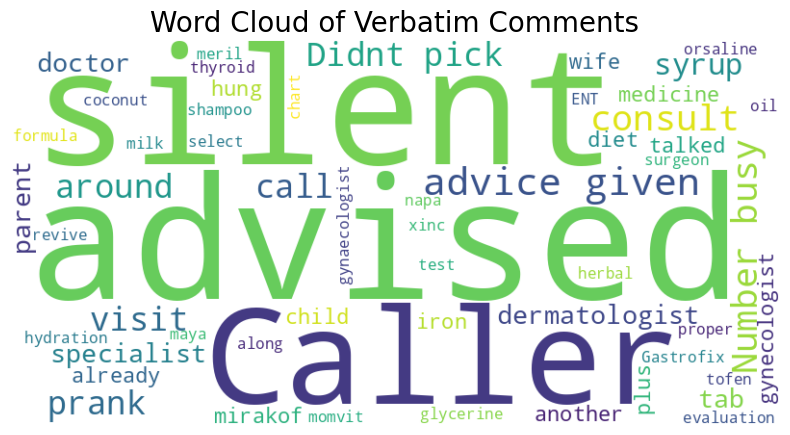

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
text = ' '.join(doctor_crm['Verbatim'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Verbatim Comments', fontsize=20)
plt.show()


#  
# Call Status vs. Caller **Patient**  


In [ ]:

# Count occurrences of Call Status and Caller Patient combinations
heatmap_data = doctor_crm.groupby(['Call Status', 'Caller Patient']).size().unstack(fill_value=0)

# Create a heatmap
fig = px.imshow(heatmap_data,
                labels=dict(x="Caller Patient", y="Call Status", color="Count"),
                title="Heatmap of Call Status vs. Caller Patient",
                color_continuous_scale='YlGnBu')

# Customize layout
fig.update_xaxes(title_text='Caller Patient', tickangle=-45)
fig.update_yaxes(title_text='Call Status')

# Show the figure
fig.show()


In [40]:

# Count occurrences of each Caller Patient per Call Status
facet_counts = doctor_crm.groupby(['Caller Patient', 'Call Status']).size().reset_index(name='Count')

# Create a faceted horizontal bar chart
fig = px.bar(facet_counts,
             x='Count',  # Set x to Count for horizontal bars
             y='Call Status',  # Set y to Call Status
             color='Call Status',
             facet_col='Caller Patient',
             title='Faceted Horizontal Bar Chart of Call Status by Caller Patient',
             barmode='stack',
             orientation='h')  # Set orientation to horizontal

# Customize layout
fig.update_layout(xaxis_title='Count', yaxis_title='Call Status')

# Show the figure
fig.show()


###IDC Data

In [ ]:
idc_survey = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/IDC_Survey_Sample.xlsx')

In [ ]:
idc_survey.head(5)

,So Name,Agent Name,Phone Number,Brand,Date of Birth,Gender,Address,Daily Achievement in Net Delivery Value,Incentive,Trade Promotion,...,Score (MTD Sales),এই মাসে আপনি সর্বোচ্চ কত টাকা ইন্সেন্টিভ উপার্জন করতে পারবেন মনে করছেন?,Response (Incentive Achievement),Score (Incentive Achievement),ট্রেড প্রমোশন নলেজ চেক,Response (Trader Promotion),Score (Trader Promotion),আপনি কি আপনার বন্ধুকে আইডিসিতে কাজ করার পরামর্শ দেবেন?,Response (Referance),Score (Referance)
0,Bikash Roy,Farzana,1738714139,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,15000,Yes,2.0,Yes,Yes,2.0,Yes,Yes,2.0
1,Minhaj Miah,Afsana,1733818154,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,15300,Yes,2.0,yes,Yes,2.0,yes,Yes,2.0
2,Milton Bapary,Afsana,1837903742,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Basudev Shaha,Farzana,1742384879,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,7500,NaN,NaN,Yes,Yes,2.0,Yes,Yes,2.0
4,Assiduzzman Ahide,Farzana,1710960137,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,2.0,7000,NaN,NaN,Yes,Yes,2.0,Yes,Yes,2.0


###Senora Data

In [ ]:
senora_survey = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/Senora_Survey_Sample1.xlsx')

In [ ]:
senora_survey.head(5)

,Form Name,Name,Profession,Family Income,Education,Age,Gender,Contact No,Alt Contact No,Address,...,Q13.আপনি কি সুগন্ধ যুক্ত স্যানিটারি ন্যাপকিন ব্যবহার করতে পছন্দ করেন ?,Design_ Preference1: দেখানো স্যানিটারি ন্যাপকিন গুলোর মধ্যে ফ্লোরাল ডিজাইন দেখে আপনার সবচেয়ে পছন্দের ১ম ন্যাপকিন ডিজাইনটি সিলেক্ট করুন।,Design_ Preference 2: স্যানিটারি ন্যাপকিন গুলোর মধ্যে ফ্লোরাল ডিজাইন দেখে আপনার পছন্দের উপর ভিত্তি করে ১ম ন্যাপকিনটি বাদে ২য় একটি ডিজাইন সিলেক্ট করুন।,Design_Preference 3: স্যানিটারি ন্যাপকিন গুলোর মধ্যে ফ্লোরাল ডিজাইন দেখে আপনার পছন্দের উপর ভিত্তি করে ২য় ন্যাপকিনটি বাদে ৩য় একটি ডিজাইন সিলেক্ট করুন।,DG1:অন্যান্য ডিজাইনটিগুলোর চেয়ে ১ম ডিজাইনটি কেন বেশি ভালো লেগেছে ? অনুগ্রহ করে কারণগুলো বলুন।,DG2:আপনার সিলেক্ট করা প্রথম ডিজাইনটি সার্বিকভাবে দেখে এটি কি ধরণের ন্যাপকিন হতে পারে বলে মনে হচ্ছে ?,BP Full Name,BP Location,Submited Date,Unnamed: 52
0,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Munni,Home Maker,20000-30000 taka,Below S.S.C,31-35 Years,Female,1314749887,1314749887,Muslim nogor hasem madborar bari,...,"(হ্যাঁ)\nযদি পছন্দ করে থাকেন, তাহলে সুগন্ধ যুক...",F,F,F,NaN,NaN,BP 1 Narayanganj BP111,Patiya,2024-07-05 01:22:16,NaN
1,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Choya moni,Student,20000-30000 taka,S.S.C,Below 20 years,Female,1314749887,1314749887,"Muslimnagar,Hasem madbor",...,"(হ্যাঁ)\nযদি পছন্দ করে থাকেন, তাহলে সুগন্ধ যুক...",C,E,B,sundor,nah,BP 1 Narayanganj BP111,Patiya,2024-07-05 01:23:30,NaN
2,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Choya moni,Student,20000-30000 taka,S.S.C,Below 20 years,Female,1314749887,1314749887,"Muslimnagar,Hasem madbor",...,()\n\n,NaN,NaN,NaN,NaN,NaN,BP 1 Narayanganj BP111,Nārāyanganj,2024-09-20 02:27:04,NaN
3,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Choya moni,Student,20000-30000 taka,S.S.C,Below 20 years,Female,1314749887,1314749887,"Muslimnagar,Hasem madbor",...,()\n\n,NaN,NaN,NaN,NaN,NaN,BP 1 Narayanganj BP111,Nārāyanganj,2024-09-20 02:32:40,NaN
4,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Taslima,Home Maker,20000-30000 taka,S.S.C,21-25 Years,Female,1323549655,132359655,Narayan gonj,...,(না)\n\n,E,C,B,Colour,NaN,BP 1 Narayanganj BP111,Patiya,2024-07-05 11:19:39,NaN
